In [36]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
import folium

In [38]:
sns.set_style("darkgrid")

# Import Data

In [39]:
data = pd.read_json('train.json')
data = data.reset_index()

# 1.1 Plot histograms for Price, Latitude & Longitude

## Price

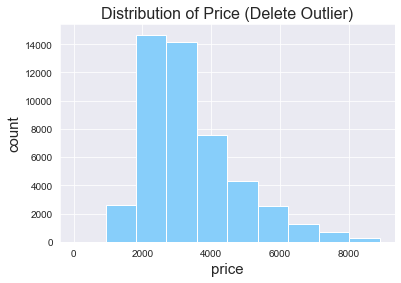

In [40]:
price = data[data['price']<=8900].price
plt.hist(price, color="lightskyblue")
plt.title('Distribution of Price (Delete Outlier)',fontdict={'fontsize': 16})
plt.xlabel('price',fontdict={'fontsize': 15})
plt.ylabel('count',fontdict={'fontsize': 15})
plt.savefig('price_k.png',dpi=300,bbox_inches = 'tight')

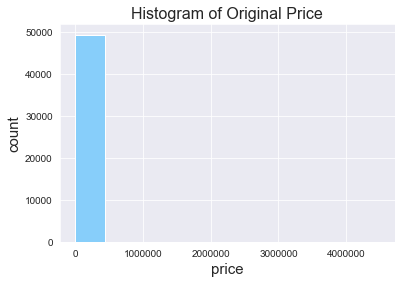

In [41]:
plt.hist(data['price'],color ="lightskyblue")
plt.title('Histogram of Original Price',fontdict={'fontsize': 16})
plt.xlabel('price',fontdict={'fontsize': 15})
plt.ylabel('count',fontdict={'fontsize': 15})
plt.savefig('price.png',dpi=300,bbox_inches = 'tight')

## Latitude

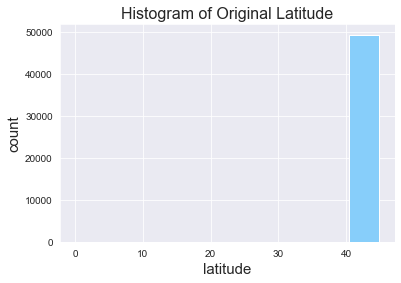

In [42]:
plt.hist(data['latitude'],color ="lightskyblue")
plt.title('Histogram of Original Latitude',fontdict={'fontsize': 16})
plt.xlabel('latitude',fontdict={'fontsize': 15})
plt.ylabel('count',fontdict={'fontsize': 15})
plt.savefig('latitude.png',dpi=300,bbox_inches = 'tight')

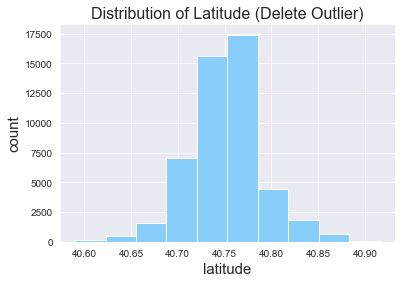

In [43]:
latitude =data[(data['latitude'] < 40.92) & (data['latitude'] > 40.59)].latitude
plt.hist(latitude, color="lightskyblue")
plt.title('Distribution of Latitude (Delete Outlier)',fontdict={'fontsize': 16})
plt.xlabel('latitude',fontdict={'fontsize': 15})
plt.ylabel('count',fontdict={'fontsize': 15})
plt.savefig('latitude_k.png',dpi=300,bbox_inches = 'tight')

## Longitude

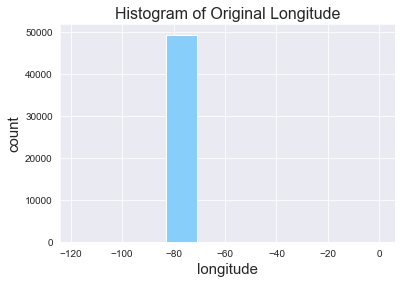

In [44]:
plt.hist(data['longitude'],color ="lightskyblue")
plt.title('Histogram of Original Longitude',fontdict={'fontsize': 16})
plt.xlabel('longitude',fontdict={'fontsize': 15})
plt.ylabel('count',fontdict={'fontsize': 15})
plt.savefig('longitude.png',dpi=300,bbox_inches = 'tight')

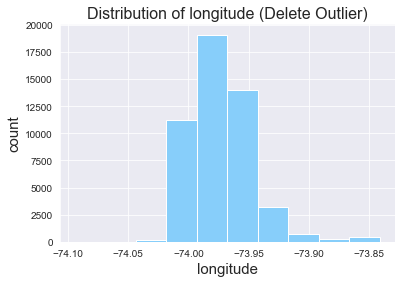

In [45]:
longitude =data[(data['longitude'] <= -73.84) & (data['longitude'] >= -74.10)].longitude
plt.hist(longitude, color="lightskyblue")
plt.title('Distribution of longitude (Delete Outlier)',fontdict={'fontsize': 16})
plt.xlabel('longitude',fontdict={'fontsize': 15})
plt.ylabel('count',fontdict={'fontsize': 15})
plt.savefig('longitude_k.png',dpi=300,bbox_inches = 'tight')

# 1.2 Plot hour-wise listing trend and find out the top 5 busiest hours

In [46]:
def datehour(r):
    return str(r['date']) + '-' + str(r['hour'])

In [47]:
temp = pd.DatetimeIndex(data['created'])
data['date'] = temp.date
data['hour'] = temp.hour
data['datehour'] = data.apply(datehour, axis=1)

In [48]:
hourall = data[['datehour', 'created']].groupby('datehour').count().reset_index().sort_values(['datehour'], ascending=True)
hour24 = data[['hour', 'created']].groupby('hour').count().reset_index().sort_values('hour', ascending=True)

In [49]:
hourall.sort_values(['created'], ascending=False).iloc[:5]
sns.set_style("darkgrid")

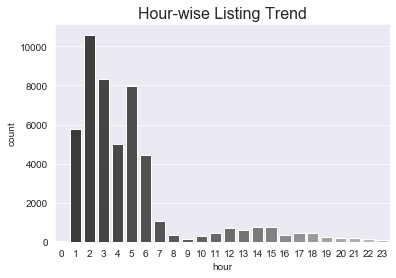

In [50]:
sns.countplot(x='hour', data=data,palette = 'Greys_d')
hour24.sort_values(['created'], ascending=False).iloc[:5]
plt.title('Hour-wise Listing Trend',fontdict={'fontsize': 16})
plt.savefig('hour24.png',dpi=300,bbox_inches = 'tight')

# 1.3 Visualization to show the proportion of target variable values

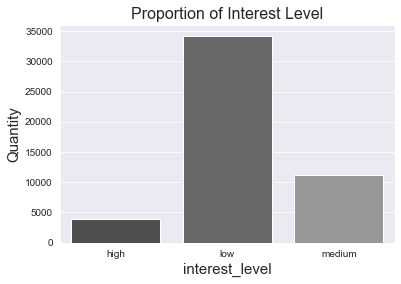

In [51]:
a = data['interest_level'].groupby(data['interest_level']).count()
X = list(['high','low','medium'])
interest_pic = sns.barplot(x = X, y = a,palette = 'Greys_d')#palette="Blues_d"
interest_pic.set_title('Proportion of Interest Level',fontdict={'fontsize': 16})
interest_pic.set_ylabel('Quantity',fontdict={'fontsize': 15})
interest_pic.set_xlabel('interest_level',fontdict={'fontsize': 15})
plt.savefig('interest_level.png',dpi=500,bbox_inches = 'tight')

# 2.1 Find out the number of missing values in each variable

In [52]:
# created listing_id manager_id price is good

In [53]:
data_without_description = data[data['description']=='']
print('Description Missing: {}'.format(data_without_description.count().mean()))
data_without_display_address = data[data['display_address']=='']
print('Display Address Missing: {}'.format(data_without_display_address.count().mean()))

Description Missing: 1446.0
Display Address Missing: 135.0


In [54]:
data['features_len'] = data['features'].apply(len)
data_without_features = data[data['features_len']==0]
print('Feature Missing: {}'.format(data_without_features.count().mean()))

Feature Missing: 3218.0


In [55]:
data_without_latitude = data[data['latitude']==0]
print('Latitude Missing: {}'.format(data_without_latitude.count().mean()))

Latitude Missing: 12.0


In [56]:
data_without_longitude = data[data['longitude']==0]
print('Longitude Missing: {}'.format(data_without_longitude.count().mean()))

Longitude Missing: 12.0


In [57]:
data['photos_len'] = data['photos'].apply(len)
data_without_photos = data[data['photos_len']==0]
print('Photos Missing: {}'.format(data_without_photos.count().mean()))

Photos Missing: 3615.0


In [58]:
data_without_street_address = data[data['street_address']=='']
print('Street Address Missing: {}'.format(data_without_street_address.count().mean()))

Street Address Missing: 10.0


# 2.2 Find out the number of outliers in each variable. 

In [59]:
def outlier(nums):
    Q1, Q2, Q3 = np.percentile(nums, (25, 50, 75))
    print('25% = ', Q1, ' 50% = ', Q2, ' 75% = ', Q3)
    IQR = Q3 - Q1
    mild = nums[(nums > Q3+1.5*IQR) | (nums < Q1-1.5*IQR)].count()
    extreme = nums[(nums > Q3+3*IQR) | (nums < Q1-3*IQR)].count()
    print('mild outliers ', '>', Q3+1.5*IQR, 'or <', Q1-1.5*IQR, ': ', mild)
    print('extreme outliers ', '>', Q3+3*IQR, 'or <', Q1-3*IQR, ': ', extreme)
    sns.violinplot(y=nums)

## 2.2.1 Price Outlier

25% =  2500.0  50% =  3150.0  75% =  4100.0
mild outliers  > 6500.0 or < 100.0 :  2788
extreme outliers  > 8900.0 or < -2300.0 :  1223


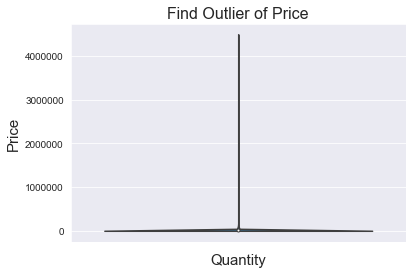

In [60]:
outlier(data['price'])
plt.title('Find Outlier of Price',fontdict={'fontsize': 16})
plt.xlabel('Quantity',fontdict={'fontsize': 15})
plt.ylabel('Price',fontdict={'fontsize': 15})
plt.savefig('Outlier_price.png',dpi=300,bbox_inches = 'tight')

number of outlier:109.0


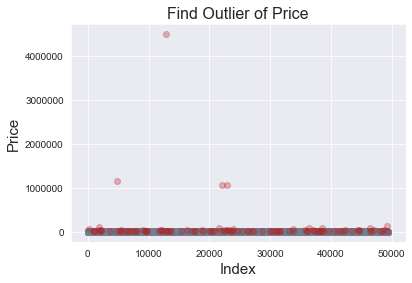

In [61]:
print('number of outlier:{}'.format(data[data['price']>20000].count().mean()))
plt.scatter(y = data[data['price']<=20000].price, x = data[data['price']<=20000].index, color = 'slategrey')
plt.scatter(y = data[data['price']>20000].price, x = data[data['price']>20000].index, color = 'firebrick',alpha = 0.3)
plt.title('Find Outlier of Price',fontdict={'fontsize': 16})
plt.xlabel('Index',fontdict={'fontsize': 15})
plt.ylabel('Price',fontdict={'fontsize': 15})
plt.savefig('Outlier_price.png',dpi=300,bbox_inches = 'tight')

## 2.2.3 Latitude Longitude Outlier

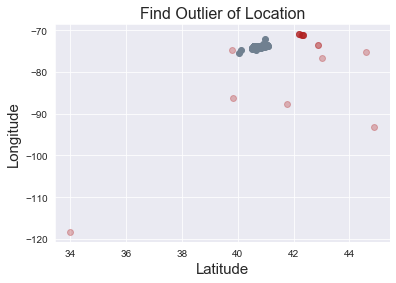

In [62]:
geoOutlier1 = data[(data['latitude'] > 41.5) | (data['latitude'] < 40) | (data['longitude'] < -80) & (data['longitude'] > -70)]
geoOutlier1 = geoOutlier1[(geoOutlier1['latitude']!=0)&(geoOutlier1['longitude']!=0)]
data1 = data[(data['latitude'] <= 41.5) & (data['latitude'] >= 40) & (data['longitude'] >= -80) & (data['longitude'] <= -70)]
plt.scatter(data1['latitude'], data1['longitude'],color='slategray')
plt.scatter(geoOutlier1['latitude'], geoOutlier1['longitude'],color = 'firebrick',alpha=0.3)
plt.title('Find Outlier of Location',fontdict={'fontsize': 16})
plt.xlabel('Latitude',fontdict={'fontsize': 15})
plt.ylabel('Longitude',fontdict={'fontsize': 15})
plt.savefig('Outlier_Location.png',dpi=300,bbox_inches = 'tight')

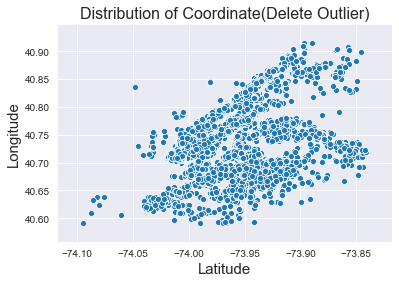

In [65]:
geoOutlier2 = data[(data['latitude'] >= 40.92) | (data['latitude'] <= 40.59) | (data['longitude'] <= -74.10) | (data['longitude'] >= -73.84)]
data_nout = data[(data['latitude'] < 40.92) & (data['latitude'] > 40.59) & (data['longitude'] > -74.10) & (data['longitude'] < -73.84)]
plt.title('Geographical coordinates scatter plot')
sns.scatterplot(data_nout['longitude'], data_nout['latitude'])
plt.title('Distribution of Coordinate(Delete Outlier)',fontdict={'fontsize': 16})
plt.xlabel('Latitude',fontdict={'fontsize': 15})
plt.ylabel('Longitude',fontdict={'fontsize': 15})
plt.savefig('111.png',dpi=500)

## 2.2.4 Bedrooms & Bathrooms

25% =  0.0  50% =  0.0  75% =  1.0
mild outliers  > 2.5 or < -1.5 :  616
extreme outliers  > 4.0 or < -3.0 :  6


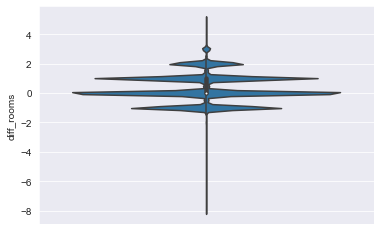

In [67]:
data['diff_rooms'] = data['bedrooms'] - data['bathrooms']
outlier(data['diff_rooms'])

number of outlier:616.0


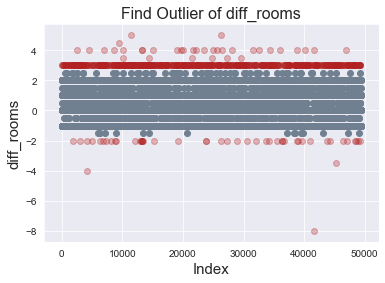

In [68]:
print('number of outlier:{}'.format(data[(data['diff_rooms']>2.5)|(data['diff_rooms']<-1.5)].count().mean()))
plt.scatter(y = data[(data['diff_rooms']<=2.5)&(data['diff_rooms']>=-1.5)].diff_rooms, x = data[(data['diff_rooms']<=2.5)&(data['diff_rooms']>=-1.5)].index, color = 'slategrey')
plt.scatter(y = data[(data['diff_rooms']>2.5)|(data['diff_rooms']<-1.5)].diff_rooms, x = data[(data['diff_rooms']>2.5)|(data['diff_rooms']<-1.5)].index, color = 'firebrick',alpha = 0.3)
plt.title('Find Outlier of diff_rooms',fontdict={'fontsize': 16})
plt.xlabel('Index',fontdict={'fontsize': 15})
plt.ylabel('diff_rooms',fontdict={'fontsize': 15})
plt.savefig('Outlier_diff_rooms.png',dpi=300,bbox_inches = 'tight')